In [3]:
import sys, os, pygmt, importlib
mod_path = '/home/581/da1339/AFIM/src/AFIM/src'
sys.path.insert(0, mod_path)
from sea_ice_toolbox         import SeaIceToolbox, SeaIceToolboxManager
import numpy                 as np
import pandas                as pd
import xarray                as xr
import xesmf                 as xe
import matplotlib.pyplot     as plt
from pathlib  import Path

In [17]:
P_cst = Path.home() / "AFIM_gv90/coastal_drag/form_factors/AAD_high-res_cstln_v7p9_noGI.nc"
F2 = xr.open_dataset(P_cst)
F2

<xarray.Dataset> Size: 16MB
Dimensions:  (nj: 1080, ni: 1440, ncoast: 191070)
Coordinates:
  * ni       (ni) int32 6kB 0 1 2 3 4 5 6 ... 1433 1434 1435 1436 1437 1438 1439
  * nj       (nj) int32 4kB 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * ncoast   (ncoast) int64 2MB 0 1 2 3 4 ... 191065 191066 191067 191068 191069
Data variables:
    F2x      (nj, ni) float32 6MB ...
    F2y      (nj, ni) float32 6MB ...
    lon      (ncoast) float32 764kB ...
    lat      (ncoast) float32 764kB ...
Attributes:
    title:               High-resolution coastline-derived F2 form factors fo...
    references:          Liu et al. (2022) JGR Oceans, doi:10.1029/2022JC0184...
    coastline_source:    /g/data/gv90/da1339/coastlines/high_res_coast/add_co...
    grid_source:         /g/data/gv90/da1339/grids/ACCESS-OM3-025_Cgrid.nc
    proj_crs:            EPSG:3031
    coast_write_stride:  25
    lat_subset_max:      -30.0
    created_by:          SeaIceToolbox.SeaIceGridWork.build_F2_form_factors_f...

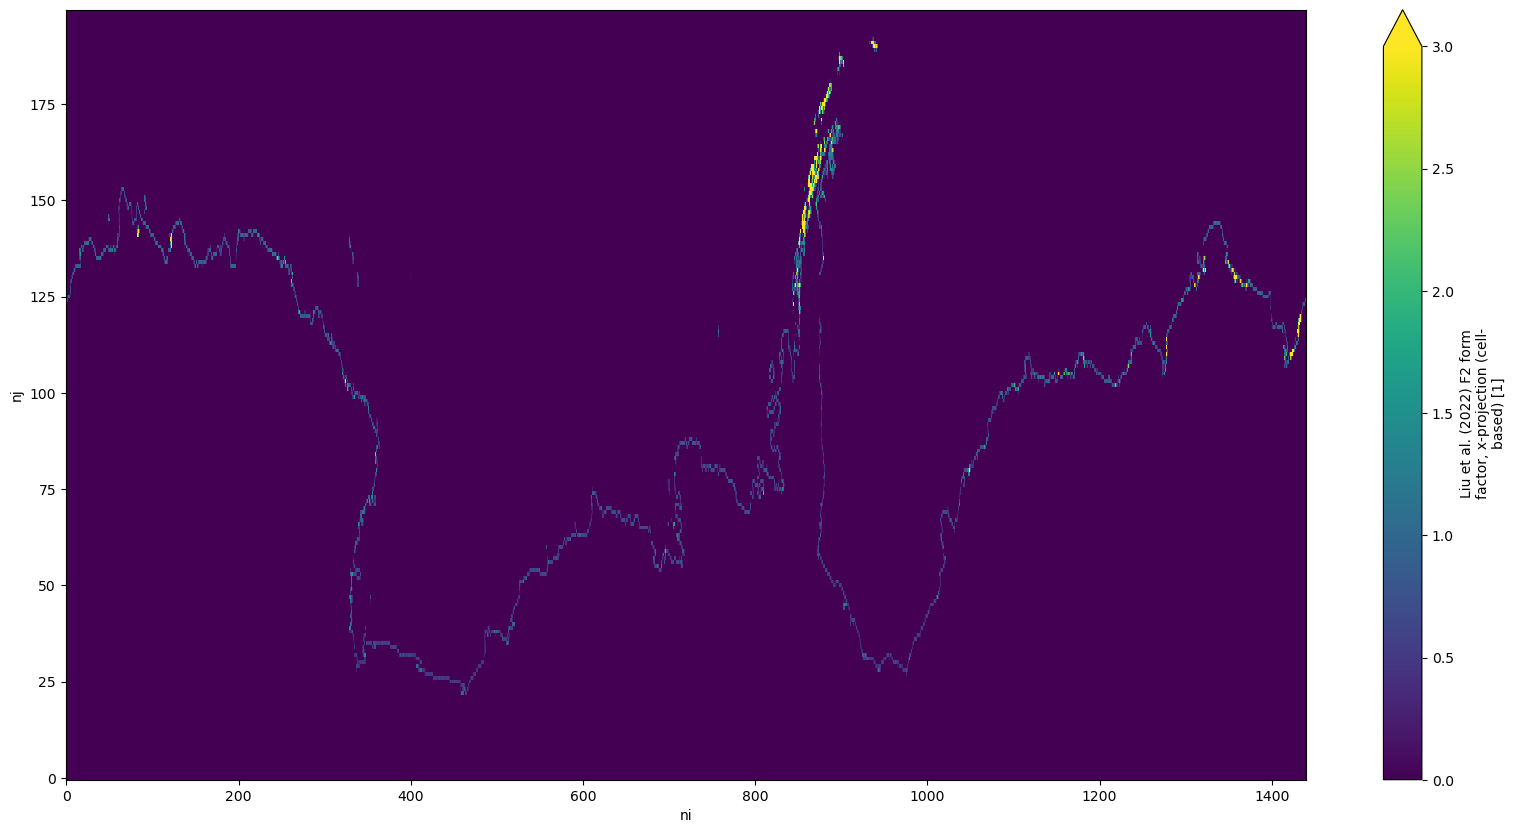

In [20]:
F2['F2x'].isel(nj=slice(0,200)).plot(figsize=(20,10),vmin=0,vmax=3)

In [16]:
print(F2['F2x_coast'].isel(nj=slice(0,200)).where(F2['F2x_coast']>0).quantile(0.1).values)
print(F2['F2x_coast'].isel(nj=slice(0,200)).where(F2['F2x_coast']>0).quantile(0.9).values)
print(F2['F2y_coast'].isel(nj=slice(0,200)).where(F2['F2y_coast']>0).quantile(0.1).values)
print(F2['F2y_coast'].isel(nj=slice(0,200)).where(F2['F2y_coast']>0).quantile(0.9).values)

0.17406112551689149
1.8466676473617556
0.20926614552736286
2.8254756689071656
